# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
from pprint import pprint

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = url + "&appid=" + weather_api_key + "&q="

# Define an empty list to fetch the weather data for each city
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

for city in cities:
    try:
        response = requests.get(f'{query_url}{city}').json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f'Processing Record {record} | {city}')
        record = record + 1
    except KeyError:
        print(f'City not found. Skipping...')
    time.sleep(1)
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
City not found. Skipping...
Processing Record 1 | sioux lookout
Processing Record 2 | san andres
Processing Record 3 | crateus
City not found. Skipping...
Processing Record 4 | arman
City not found. Skipping...
Processing Record 5 | hithadhoo
Processing Record 6 | scarisoara
Processing Record 7 | cape town
Processing Record 8 | port hardy
Processing Record 9 | mount gambier
Processing Record 10 | kodiak
Processing Record 11 | arraial do cabo
Processing Record 12 | hasanabad
Processing Record 13 | lavrentiya
Processing Record 14 | hobart
Processing Record 15 | solnechnyy
Processing Record 16 | portland
Processing Record 17 | jamestown
Processing Record 18 | nikolskoye
Processing Record 19 | brae
Processing Record 20 | punta arenas
Processing Record 21 | makakilo city
Processing Record 22 | san patricio
Processing Record 23 | busselton
Processing Record 24 | guarapari
Processing Record 25 | ushuaia
City no

Processing Record 225 | vanimo
Processing Record 226 | pangnirtung
Processing Record 227 | tura
Processing Record 228 | lebu
Processing Record 229 | nishihara
Processing Record 230 | laguna
Processing Record 231 | valladolid
Processing Record 232 | kurtamysh
Processing Record 233 | ponta do sol
Processing Record 234 | fairbanks
Processing Record 235 | debre zeyit
Processing Record 236 | fomboni
Processing Record 237 | nichinan
Processing Record 238 | palana
Processing Record 239 | fort wellington
City not found. Skipping...
Processing Record 240 | kenai
City not found. Skipping...
Processing Record 241 | salisbury
Processing Record 242 | cuamba
Processing Record 243 | geneva
Processing Record 244 | malia
Processing Record 245 | drumheller
Processing Record 246 | japura
Processing Record 247 | lubao
Processing Record 248 | kamakhyanagar
City not found. Skipping...
Processing Record 249 | kallaste
Processing Record 250 | bilibino
Processing Record 251 | arlit
Processing Record 252 | klak

Processing Record 453 | olafsvik
City not found. Skipping...
Processing Record 454 | imeni stepana razina
Processing Record 455 | chambersburg
Processing Record 456 | luganville
Processing Record 457 | ormara
Processing Record 458 | letnyaya stavka
Processing Record 459 | hervey bay
Processing Record 460 | seminole
Processing Record 461 | mahebourg
Processing Record 462 | ambilobe
Processing Record 463 | guerrero negro
City not found. Skipping...
Processing Record 464 | isangel
Processing Record 465 | bereda
Processing Record 466 | abbeville
Processing Record 467 | hovd
City not found. Skipping...
Processing Record 468 | moose factory
Processing Record 469 | reconquista
Processing Record 470 | port keats
Processing Record 471 | ust-barguzin
Processing Record 472 | manoel urbano
Processing Record 473 | pontianak
Processing Record 474 | abha
Processing Record 475 | ampanihy
City not found. Skipping...
Processing Record 476 | conceicao do araguaia
Processing Record 477 | dhone
City not fo

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(
                            {
                                "City":city_name,
                                "Lat":lat,
                                "Lng":lng,
                                "Max Temp":max_temp,
                                "Humidity":humidity,
                                "Cloudiness":cloudiness,
                                "Wind Speed":wind_speed,
                                "Country":country,
                                "Date":date
                            }
                         )
# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [11]:
# Display sample data
city_data_df.Date = city_data_df.Date.map(lambda x: '{:.0f}'.format(x))
city_data_df.Cloudiness = city_data_df.Cloudiness.map(lambda x: '{:.0f}'.format(x))
city_data_df.Humidity = city_data_df.Humidity.map(lambda x: '{:.0f}'.format(x))

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sioux Lookout,50.1001,-91.9170,15.87,79,40,6.91,CA,1675825501
1,San Andrés,12.5847,-81.7006,80.62,78,40,16.11,CO,1675825252
2,Crateús,-5.1783,-40.6775,72.18,74,99,2.48,BR,1675825300
3,Arman',59.7000,150.1667,-11.99,75,33,7.67,RU,1675825506
4,Hithadhoo,-0.6000,73.0833,81.19,72,15,7.52,MV,1675825509


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Sioux Lookout,50.1001,-91.9170,15.87,79,40,6.91,CA,1675825501
1,San Andrés,12.5847,-81.7006,80.62,78,40,16.11,CO,1675825252
2,Crateús,-5.1783,-40.6775,72.18,74,99,2.48,BR,1675825300
3,Arman',59.7000,150.1667,-11.99,75,33,7.67,RU,1675825506
4,Hithadhoo,-0.6000,73.0833,81.19,72,15,7.52,MV,1675825509


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

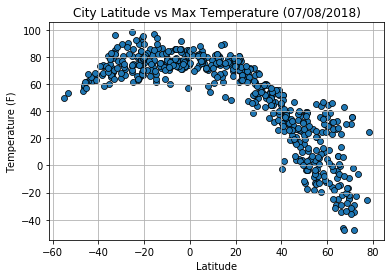

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Max Temperature (07/08/2018)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

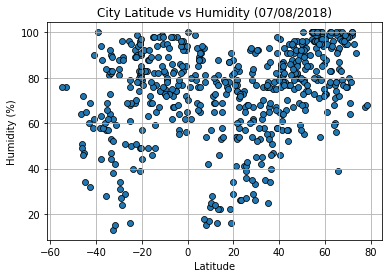

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Humidity (07/08/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

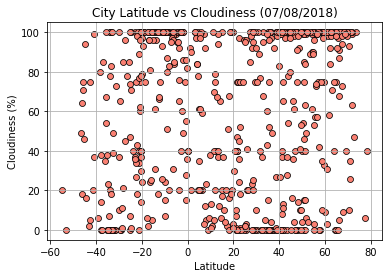

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth = .75, color="salmon")
plt.title("City Latitude vs Cloudiness (07/08/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

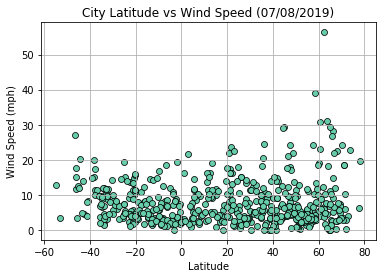

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth = .75, color="mediumaquamarine")
plt.title("City Latitude vs Wind Speed (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames
north = city_data_df.loc[city_data_df['Lat'] >= 0]
south = city_data_df.loc[city_data_df['Lat'] < 0]


In [31]:

# Display sample data
north.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Sioux Lookout,50.1001,-91.9170,15.87,79,40,6.91,CA,1675825501
1,San Andrés,12.5847,-81.7006,80.62,78,40,16.11,CO,1675825252
3,Arman',59.7000,150.1667,-11.99,75,33,7.67,RU,1675825506
5,Scărişoara,44.0000,24.5667,28.83,77,54,3.44,RO,1675825510
7,Port Hardy,50.6996,-127.4199,39.38,93,75,5.75,CA,1675825243


In [33]:

# Display sample data
south.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Crateús,-5.1783,-40.6775,72.18,74,99,2.48,BR,1675825300
4,Hithadhoo,-0.6000,73.0833,81.19,72,15,7.52,MV,1675825509
6,Cape Town,-33.9258,18.4232,70.21,73,20,11.99,ZA,1675825512
8,Mount Gambier,-37.8333,140.7667,73.53,44,14,11.39,AU,1675825515
10,Arraial do Cabo,-22.9661,-42.0278,74.75,92,100,2.33,BR,1675825517


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.874


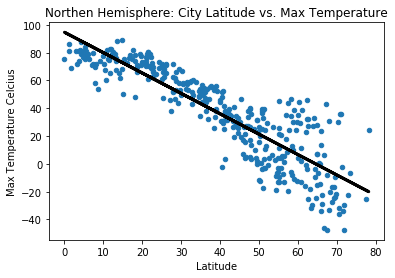

In [32]:
# Linear regression on Northern Hemisphere
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
linear_regression = linregress(north['Lat'], north['Max Temp'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)

plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.show()


The r-squared is: 0.395


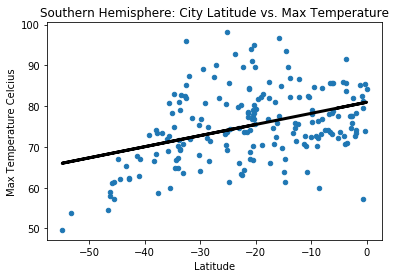

In [34]:
# Linear regression on Southern Hemisphere
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
linear_regression = linregress(south['Lat'], south['Max Temp'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)
    

plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.show()


**Discussion about the linear relationship:** 

Northen Hemisphere: City Latitude vs. Max Temperature
There is a strong negative correlation between latitude and maximum temperature on the Northern Hemisphere. The farther north from equator is a position of a city the lower is its maximum temperature.

Southern Hemisphere: City Latitude vs. Max Temperature
There is a positive correlation between maximum temperature and a latitude on the Southern Hemisphere. The closer to the equator is a city position the higher is its maximum temperature. The variance of the maximum temperature on the Southern Hemisphere is higher than on the Northern Hemisphere and there is a broader maximum temperature variation for different cities positioned on the same latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.441


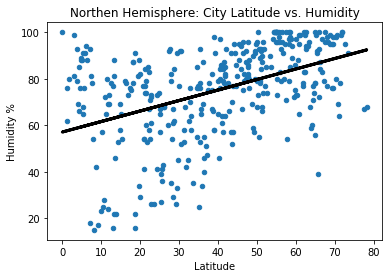

In [35]:
# Northern Hemisphere
linear_regression = linregress(north["Lat"], north["Humidity"].astype('float'))
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

The r-squared is: 0.358


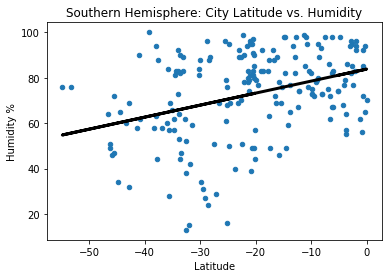

In [36]:
# Southern Hemisphere
linear_regression = linregress(south['Lat'], south['Humidity'].astype('float'))
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

**Discussion about the linear relationship:** 

Northen Hemisphere: City Latitude vs. Humidity
There is almost no correlation between humidity level and city position moving north from equator.

Southern Hemisphere: City Latitude vs. Humidity
There is almost no correlating between humidity levels and a city position on the Southern Hemisphere. Higher levels of humidity are observed close to the equator, however, the further south from equator the broader is a humidity level range for the same altitudes.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.265


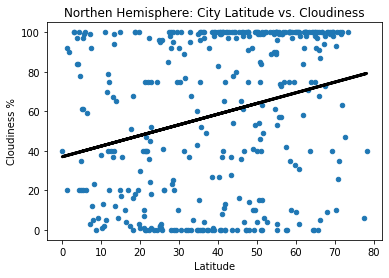

In [37]:
# Northern Hemisphere
linear_regression = linregress(north['Lat'], north['Cloudiness'].astype('float'))
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

The r-squared is: 0.396


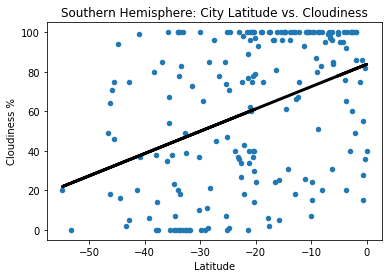

In [38]:
# Southern Hemisphere
linear_regression = linregress(south['Lat'], south['Cloudiness'].astype('float'))
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

**Discussion about the linear relationship:** 

Northen Hemisphere: City Latitude vs. Cloudiness
There is no correlation between cloudiness and a distance from the equator for the cities’ positions. Cloudiness levels are widely spread across all latitudes along the whole Northern Hemisphere.

Southern Hemisphere: City Latitude vs. Cloudiness
There is no correlation between the cloudiness level and a latitude on the Southern Hemisphere. The level of cloudiness is ranging from 0% to 100% independent of a latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.069


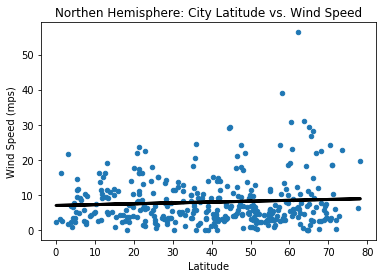

In [39]:
# Northern Hemisphere
linear_regression = linregress(north['Lat'], north['Wind Speed'].astype('float'))
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',)
plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')
plt.title('Northen Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.show()

The r-squared is: -0.347


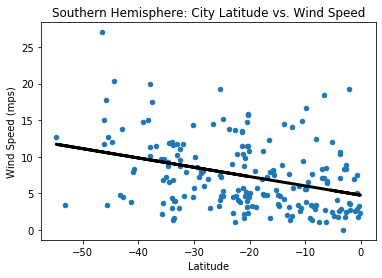

In [40]:
# Southern Hemisphere
linear_regression = linregress(south['Lat'], south['Wind Speed'].astype('float'))
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',)
plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.show()

**Discussion about the linear relationship:**

Northen Hemisphere: City Latitude vs. Wind Speed
There is very low correlation between the wind speed and a latitude on the Northern Hemisphere. Majority of cities have winds with variable speed levels ranging between 0 mph and 20 mph along the whole Northern Hemisphere.

Southern Hemisphere: City Latitude vs. Wind Speed
There is a very low negative correlation between a wind speed and a latitude on the Southern Hemisphere. The wind speed lightly increases going farther south away from the equator.